In [19]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Visualization of the Decision Tree
from sklearn.tree import plot_tree


In [20]:
# Step 2: Load the dataset
data_path=r"C:\Users\Admin\Desktop\ML online\week5\DataSetForPhishingVSBenignUrl.csv"
# Define the column names based on the table header you provided
column_names = [
    "Querylength", "domain_token_count", "path_token_count", "avgdomaintokenlen", "longdomaintokenlen",
    "avgpathtokenlen", "tld", "charcompvowels", "charcompace", "ldl_url", "ldl_domain", "ldl_path", "ldl_filename",
    "ldl_getArg", "dld_url", "dld_domain", "dld_path", "dld_filename", "dld_getArg", "urlLen", "domainlength",
    "pathLength", "subDirLen", "fileNameLen", "this.fileExtLen", "ArgLen", "pathurlRatio", "ArgUrlRatio", 
    "argDomanRatio", "domainUrlRatio", "pathDomainRatio", "argPathRatio", "executable", "isPortEighty", 
    "NumberofDotsinURL", "ISIpAddressInDomainName", "CharacterContinuityRate", "LongestVariableValue", "URL_DigitCount",
    "host_DigitCount", "Directory_DigitCount", "File_name_DigitCount", "Extension_DigitCount", "Query_DigitCount", 
    "URL_Letter_Count", "host_letter_count", "Directory_LetterCount", "Filename_LetterCount", "Extension_LetterCount", 
    "Query_LetterCount", "LongestPathTokenLength", "Domain_LongestWordLength", "Path_LongestWordLength", 
    "sub-Directory_LongestWordLength", "Arguments_LongestWordLength", "URL_sensitiveWord", "URLQueries_variable",
    "spcharUrl", "delimeter_Domain", "delimeter_path", "delimeter_Count", "NumberRate_URL", "NumberRate_Domain",
    "NumberRate_DirectoryName", "NumberRate_FileName", "NumberRate_Extension", "NumberRate_AfterPath", "SymbolCount_URL",
    "SymbolCount_Domain", "SymbolCount_Directoryname", "SymbolCount_FileName", "SymbolCount_Extension", 
    "SymbolCount_Afterpath", "Entropy_URL", "Entropy_Domain", "Entropy_DirectoryName", "Entropy_Filename",
    "Entropy_Extension", "Entropy_Afterpath", "URL_Type_obf_Type"
]
dtype_dict = {
    'Querylength': 'float64', 
    'domain_token_count': 'float64', 
    'path_token_count': 'float64',
    # 根据每列的预期数据类型逐一添加
    # 例如：'col_name': 'float64' 或 'object'（字符串）
    'URL_Type_obf_Type': 'object'  # 假设最后一列是分类标签
}
df = pd.read_csv(data_path, header=None, names=column_names, skiprows=1, low_memory=False)

# Display the first few rows of the dataset
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [21]:
# Step 3: Check the data types to identify non-numeric columns
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Querylength                int64
domain_token_count         int64
path_token_count           int64
avgdomaintokenlen        float64
longdomaintokenlen         int64
                          ...   
Entropy_DirectoryName    float64
Entropy_Filename         float64
Entropy_Extension        float64
Entropy_Afterpath        float64
URL_Type_obf_Type         object
Length: 80, dtype: object


In [22]:
# Step 4: Handle Inf and NaN values only in numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns

# Replace Inf in numeric columns with NaN
df[numeric_columns] = df[numeric_columns].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values (or use fillna to fill missing values)
df.dropna(inplace=True)

In [24]:
# Step 5: Split data into features and target
X = df.iloc[:, :-1]  # All columns except the last are features
y = df.iloc[:, -1]   # The last column is the label (target)

# Step 6: Convert target column (if necessary)
# Check unique values of the target to ensure it's properly formatted
print(f"Unique values in the target (y): {y.unique()}")


Unique values in the target (y): ['Defacement' 'benign' 'malware' 'phishing' 'spam']


In [25]:
# Step 7: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the training and testing sets
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')


Training set shape: (15185, 79)
Testing set shape: (3797, 79)


In [26]:
# Step 8: Train decision trees with different depths and criteria
results = []

# Loop through tree depths from 1 to 6
for depth in range(1, 7):
    for criterion in ['gini', 'entropy']:
        # Initialize the Decision Tree Classifier
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=42)
        
        # Train the model
        clf.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = clf.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the results
        results.append({
            'depth': depth,
            'criterion': criterion,
            'accuracy': accuracy
        })

# Convert the results into a DataFrame for easier visualization
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

    depth criterion  accuracy
0       1      gini  0.383461
1       1   entropy  0.409534
2       2      gini  0.525415
3       2   entropy  0.570450
4       3      gini  0.631024
5       3   entropy  0.662892
6       4      gini  0.717672
7       4   entropy  0.715828
8       5      gini  0.760337
9       5   entropy  0.805899
10      6      gini  0.783777
11      6   entropy  0.845931


In [33]:
'''
## Results Analysis and Comparison of the 12 Cases
1. Impact of Tree Depth on Accuracy:
Depth = 1: At a depth of 1, both models (Gini and Entropy) perform quite poorly, with accuracy values of 0.38 and 0.41 respectively. 
This is expected because the tree is very shallow and cannot capture much of the data's complexity.

Depth = 2: At depth 2, there is a noticeable improvement in accuracy for both criteria. The Gini model achieves 52.5% accuracy, 
and the Entropy model performs slightly better with 57% accuracy. 
This indicates that adding more depth improves the model's ability to classify the data correctly.

Depth = 3 to 5: From depth 3 to 5, there is a steady improvement in performance. At depth 5, the Gini model reaches 76% accuracy, 
while the Entropy model outperforms with 80.6% accuracy. This suggests that as the depth increases, the models gain more capacity to fit the data.

Depth = 6: At depth 6, both models perform the best, with Gini achieving 78.4% accuracy and Entropy achieving 84.6%. 
However, this improvement is relatively small compared to the jump in performance from depths 3 to 5. 
This indicates that further increasing the tree depth beyond 6 might lead to diminishing returns.

2. Comparison of Gini and Entropy Criteria:
Gini Impurity: In all cases, the models using the Gini criterion show a lower accuracy compared to those using Entropy, 
although the difference is relatively small. The largest gap is observed at depth 5, where Entropy outperforms Gini by approximately 4.6%. 
This suggests that Entropy might be better at handling the complexity of the data in this case, 
though the difference may not always be significant in all datasets.

Entropy: The models using Entropy consistently outperform those using Gini. 
The difference is most pronounced at smaller depths (e.g., depth 1 and 2), where Entropy provides a better fit to the data.

3. Overfitting Consideration:
While increasing the tree depth improves accuracy on the test set, there is a risk of overfitting. 
Overfitting occurs when the model becomes too complex and starts to memorize the training data instead of generalizing to unseen data. 
At depth 6, the accuracy improvement starts to plateau. If the depth were to be increased further, 
it is likely that the model would continue to improve on the training set but not on the test set, leading to overfitting.
4. Best Model:
Based on the results, the best model in terms of accuracy is the Entropy-based Decision Tree with a depth of 6, 
achieving an accuracy of 84.6%. However, the depth 5 Entropy-based tree with 80.6% accuracy might be preferable if you're concerned about overfitting, 
as it offers a good balance between performance and complexity.
5. Insights and Recommendations:
Entropy vs. Gini: The Entropy-based models consistently outperform Gini-based models across all depths, 
suggesting that for this dataset, Entropy is a more effective criterion for splitting the nodes.

Depth 6 Performance: While depth 6 provides the best performance, the improvement from depth 5 to depth 6 is relatively small. 
Therefore, a tree with depth 5 might be a good trade-off between model complexity and performance.

Model Selection: For practical purposes, a decision tree with a depth of 5 and using Entropy as the splitting criterion appears to be the most balanced choice, 
providing strong accuracy while avoiding the risk of overfitting that comes with deeper trees.

Conclusion:
In summary, Entropy-based decision trees perform better than Gini-based trees on this dataset. Increasing the depth improves accuracy, 
but the improvement diminishes as the depth grows beyond 5. A tree with depth 5 and using Entropy is a good candidate for the best-performing model, 
offering a solid accuracy of 80.6% while maintaining a reasonable complexity.

'''

"\n## Results Analysis and Comparison of the 12 Cases\n1. Impact of Tree Depth on Accuracy:\nDepth = 1: At a depth of 1, both models (Gini and Entropy) perform quite poorly, with accuracy values of 0.38 and 0.41 respectively. \nThis is expected because the tree is very shallow and cannot capture much of the data's complexity.\n\nDepth = 2: At depth 2, there is a noticeable improvement in accuracy for both criteria. The Gini model achieves 52.5% accuracy, \nand the Entropy model performs slightly better with 57% accuracy. \nThis indicates that adding more depth improves the model's ability to classify the data correctly.\n\nDepth = 3 to 5: From depth 3 to 5, there is a steady improvement in performance. At depth 5, the Gini model reaches 76% accuracy, \nwhile the Entropy model outperforms with 80.6% accuracy. This suggests that as the depth increases, the models gain more capacity to fit the data.\n\nDepth = 6: At depth 6, both models perform the best, with Gini achieving 78.4% accuracy

In [27]:
# Step 9: Select the best-performing model at depth 2
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

# Train the best model
best_clf.fit(X_train, y_train)

# Evaluate accuracy of the best model
y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best model accuracy (depth=2, entropy): {accuracy_best}')


Best model accuracy (depth=2, entropy): 0.5704503555438504


Unique values in the target (y): ['Defacement' 'benign' 'malware' 'phishing' 'spam']


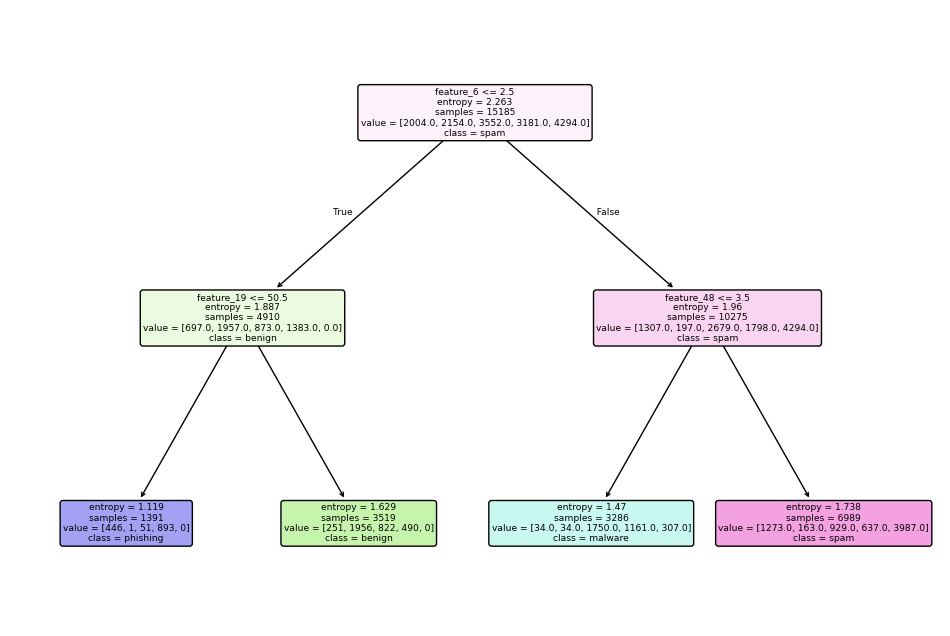

In [30]:
# Step 10: Visualize the decision tree (depth=2)

# Check the unique values in the target column (y) to ensure the correct class names
print(f"Unique values in the target (y): {y.unique()}")

# Based on the unique values in y, set class_names accordingly
# Assuming the values in y correspond to ['Benign', 'Phishing'] or other labels
class_names = y.unique().astype(str)  # Convert unique values to strings

# Now visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(best_clf, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()

